In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
food_database = pd.read_excel("2019-2020 FNDDS At A Glance - FNDDS Nutrient Values.xlsx", 
                              header = 1 #set column headers
                              )
food_database

,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),...,20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
0,11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0.0,4.38,...,0.040,0.000,0.374,0.052,0.0,0.026,0.000,0.000,0.000,87.50
1,11100000,"Milk, NFS",1004,"Milk, reduced fat",52,3.33,4.83,4.88,0.0,2.14,...,0.002,0.000,0.074,0.008,0.0,0.003,0.000,0.001,0.000,88.92
2,11111000,"Milk, whole",1002,"Milk, whole",61,3.27,4.63,4.81,0.0,3.20,...,0.004,0.000,0.115,0.013,0.0,0.004,0.001,0.002,0.000,88.10
3,11112110,"Milk, reduced fat (2%)",1004,"Milk, reduced fat",50,3.36,4.90,4.89,0.0,1.90,...,0.002,0.000,0.061,0.007,0.0,0.003,0.000,0.001,0.000,89.10
4,11112210,"Milk, low fat (1%)",1006,"Milk, lowfat",43,3.38,5.18,4.96,0.0,0.95,...,0.001,0.000,0.033,0.004,0.0,0.001,0.000,0.000,0.000,89.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5619,99997802,Tomatoes as ingredient in omelet,9999,Not included in a food category,25,1.11,5.48,3.42,1.6,0.23,...,0.000,0.000,0.089,0.004,0.0,0.000,0.000,0.000,0.000,92.57
5620,99997804,Other vegetables as ingredient in omelet,9999,Not included in a food category,39,3.25,5.74,2.73,1.4,0.39,...,0.000,0.000,0.174,0.001,0.0,0.000,0.000,0.000,0.000,89.67
5621,99997810,Vegetables as ingredient in curry,9999,Not included in a food category,52,1.81,11.60,3.25,2.2,0.19,...,0.000,0.000,0.052,0.012,0.0,0.000,0.000,0.000,0.000,85.59
5622,99998130,Sauce as ingredient in hamburgers,9999,Not included in a food category,272,1.34,17.14,13.08,0.6,22.85,...,0.106,0.133,11.810,1.682,0.0,0.015,0.000,0.000,0.002,55.97


In [40]:
food_codes = [24122131,95230000,42101110,56132990,72201100,73101010,75117020,11411400,57602100,63219000,63203010,63223020,63126500,75111500,26137120,72125100,11111000,43108010,28310110,91302010]
foods = food_database[food_database["Food code"].isin(food_codes)]
#have to add in \n for iron, zinc, 18:3
columns = ['Energy (kcal)','Protein (g)','Total Fat (g)','Carbohydrate (g)','Fiber, total dietary (g)','Calcium (mg)','Folate, total (mcg)','Vitamin A, RAE (mcg_RAE)','Vitamin B-12 (mcg)','Vitamin B-6 (mg)','Vitamin C (mg)','Vitamin D (D2 + D3) (mcg)','Vitamin E (alpha-tocopherol) (mg)','Vitamin K (phylloquinone) (mcg)','Copper (mg)','Iron\n(mg)','Magnesium (mg)','Zinc\n(mg)','Phosphorus (mg)','Selenium (mcg)','Potassium (mg)','Sodium (mg)','Choline, total (mg)','Thiamin (mg)','Riboflavin (mg)','Niacin (mg)','18:3\n(g)']

foods = foods[columns]

In [41]:
quality_rates = foods.to_numpy()

In [42]:
#removed cost
target_values = [2035, 153, 50, 200, 30, 1000, 400, 900, 2.4, 1.3, 90, 15, 15, 120, 0.9, 8, 400, 11, 700, 55, 3400, 1500, 550, 1.2, 1.3, 16, 1.6]
target_values = np.array(target_values).reshape(1,-1)

In [43]:
food_limits = [3, 0.3, 0.3, 5, 1.5, 1, 0.5, 1.5, 0.25, 0.5, 0.5, 0.5, 0.5, 0.1, 1.4, 1, 2.1, 0.1, 2.3, 0.21]
food_limits = np.array(food_limits).reshape(1,-1)

In [44]:
food_req = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0.9, 0, 0, 0, 2.25, 0.2]
food_req = np.array(food_req).reshape(1,-1)

[[1.97788538e+03 7.37652332e+01 4.74971745e+01 3.39941433e+02
  3.11936297e+01 9.06805412e+02 2.37944572e+02 9.13712082e+02
  1.63182075e+00 3.92923188e+00 2.43142254e+02 3.00943674e+00
  2.00160186e+01 2.46415721e+02 2.03360995e+00 1.15621593e+01
  4.37798600e+02 9.62544973e+00 1.41378481e+03 8.48427344e+01
  3.05745883e+03 1.45393308e+03 2.48437637e+02 1.08802360e+00
  2.11314444e+00 1.64635093e+01 4.14188506e-01]]
[[-5.71146166e+01 -7.92347668e+01 -2.50282553e+00  1.39941433e+02
   1.19362967e+00 -9.31945883e+01 -1.62055428e+02  1.37120816e+01
  -7.68179246e-01  2.62923188e+00  1.53142254e+02 -1.19905633e+01
   5.01601862e+00  1.26415721e+02  1.13360995e+00  3.56215934e+00
   3.77985995e+01 -1.37455027e+00  7.13784813e+02  2.98427344e+01
  -3.42541165e+02 -4.60669193e+01 -3.01562363e+02 -1.11976402e-01
   8.13144436e-01  4.63509297e-01 -1.18581149e+00]]
final error: 255037.82613854983


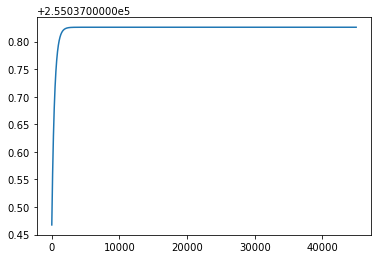

In [405]:
amounts = np.random.rand(1,20) * 10
#amounts = np.zeros((1,20))
#amounts[0,0] = 14
learning_rate = .0000001
#starting_learning_rate = .01
learning_rate_decay = 0#0.0000000001
errors = []

dinputs_momentums = np.zeros_like(amounts)
cache = np.zeros_like(amounts)
epsilon = 1e-7

beta_1 = .99
beta_2 = .99

lambda_penalty = 3e-1
penalty_cache = np.zeros_like(amounts)

for i in range(50000):

    outputs = np.dot(amounts, quality_rates)
    error = (outputs - target_values)**2
    #error[0,0] = 0
    error[0,1:][outputs[0,1:] >= target_values[0,1:]] = 0.0
    errors.append(np.sum(error))

    dloss = 2*(outputs - target_values)
    dmax = np.ones_like(outputs)

    #we are looking to stay calorie target, and minimize costs, so want to avoid those
    #but once all the other ones have hit their goals, set them to 0
    #dmax[0,1] = 0 if outputs[0,1] <= target_values[0,1] else dmax[0,1]
    #dmax[0,0] = 0
    #dmax[0,1:][outputs[0,1:] >= target_values[0,1:]] = 0.0
    #dmax[0,0] = 0.0 if outputs[0,0] <= target_values[0,0] else outputs[0,0]
    dfoods = dloss * dmax
    dinputs = np.dot(dfoods, quality_rates.T)

    #momentum
    dinputs_momentums = dinputs_momentums * beta_1 + dinputs.astype(float) * (1 - beta_1)
    correted_momentums = dinputs_momentums / (1 - beta_1 ** (i + 1))

    cache = cache * beta_2 + (1-beta_2) * dinputs.astype(float) ** 2
    corrected_cache = cache / (1 - beta_2 ** (i + 1))
    #penalty_cache += penalty_deriv **2
    
    #amounts += -learning_rate * correted_momentums / (np.sqrt(corrected_cache) + epsilon)#  + lambda_penalty * penalty_deriv)
    amounts += -learning_rate * dinputs
    learning_rate = learning_rate * (1 / (1 + learning_rate_decay * i))

    #basic constraining
    amounts[amounts > food_limits] = food_limits[amounts > food_limits]
    amounts[amounts < food_req] = food_req[amounts < food_req]


results = np.dot(amounts, quality_rates)
print(results)
print((results - target_values))
print("final error:", errors[-1])
plt.plot(errors[5000:])
plt.show()

In [406]:
amounts

array([[0.57883609, 0.        , 0.3       , 0.17319103, 1.5       ,
        0.68605997, 0.        , 1.        , 0.        , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.1       , 1.4       ,
        1.        , 2.1       , 0.1       , 2.3       , 0.2       ]])

In [407]:
test = results/target_values
test

array([[0.97193385, 0.48212571, 0.94994349, 1.69970717, 1.03978766,
        0.90680541, 0.59486143, 1.01523565, 0.67992531, 3.02248606,
        2.7015806 , 0.20062912, 1.33440124, 2.05346435, 2.25956661,
        1.44526992, 1.0944965 , 0.87504088, 2.01969259, 1.54259517,
        0.8992526 , 0.96928872, 0.4517048 , 0.90668633, 1.62549572,
        1.02896933, 0.25886782]])

In [408]:
test = test[test < 1]
test

array([0.97193385, 0.48212571, 0.94994349, 0.90680541, 0.59486143,
       0.67992531, 0.20062912, 0.87504088, 0.8992526 , 0.96928872,
       0.4517048 , 0.90668633, 0.25886782])